In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_elo = pd.read_csv("../dataset/elo_club_confirmed.csv")
df_trans = pd.read_csv("../dataset/transfer_value_confirmed.csv")
df_capacity = pd.read_csv("../dataset/team_max_capacity.csv")

In [73]:
df_trans = df_trans.rename(columns={"team": "club"})
df_capacity = df_capacity.rename(columns={"team": "club"})

df_merge = pd.merge(df_elo, df_trans, on="club", how="inner")

# 거기에 capacity까지 병합
df_merge = pd.merge(df_merge, df_capacity, on="club", how="inner")

print(df_merge.head())

df_merge.to_csv("final_club_stats.csv", index=False, encoding="utf-8-sig")
df_merge.to_excel("final_club_stats.xlsx", index=False)

          club     elo_sum  rank       sum  순위  max_capacity
0    Barcelona  1163314.68     1  230412.5   6         99354
1  Real Madrid  1160179.20     2  200725.0  10         85454
2      Chelsea  1114090.14     5  391000.0   1         41631
3    Liverpool  1111031.43     6  161900.0  15         53394
4      Arsenal  1109666.85     7  205952.5   8         59867


## 3. 데이터 병합 전 변수별 상위권 클럽 시각화

초기에는 Elo 점수(`elo_sum`), 선수단 몸값(`sum`), 경기장 관중수(`max_capacity`) 데이터를 클럽명을 기준으로 병합하여 분석을 시도했습니다.  
그러나 클럽명 표기 방식의 차이로 인해 병합 후 행 수가 급감하며, 데이터 누락 문제가 발생하였습니다.

따라서 데이터 병합 전에 각 변수별로 클럽의 순위를 개별적으로 확인하고, **토트넘(Tottenham)** 이 각 지표에서 상위권에 위치해 있는지를 시각화하여 확인하는 과정을 거쳤습니다.

---

###  Elo 점수 기반 상위 20개 클럽

- Elo 점수를 기준으로 전체 클럽을 내림차순 정렬하고 상위 20개 클럽을 추출하였습니다.
- 토트넘이 포함되어 있는지 여부를 구분하여 시각적으로 강조하였습니다.

> 🔹 **Elo 점수**는 클럽의 경기력(전력)을 종합적으로 나타내는 연속형 지표입니다.

![Elo 상위 클럽 그래프 예시](your_elo_plot.png)

---

### 선수단 몸값 기준 상위 20개 클럽

- `transfer_value_confirmed.csv` 파일의 `sum`를 기준으로 전체 클럽을 정렬하였습니다.
- 상위 20개 클럽을 대상으로 토트넘의 위치를 강조하여 막대 그래프로 시각화하였습니다.

> 🔹 **sum**는 각 팀 선수단의 전체 시장가치로, 팀의 자본력과 선수층 수준을 반영합니다.


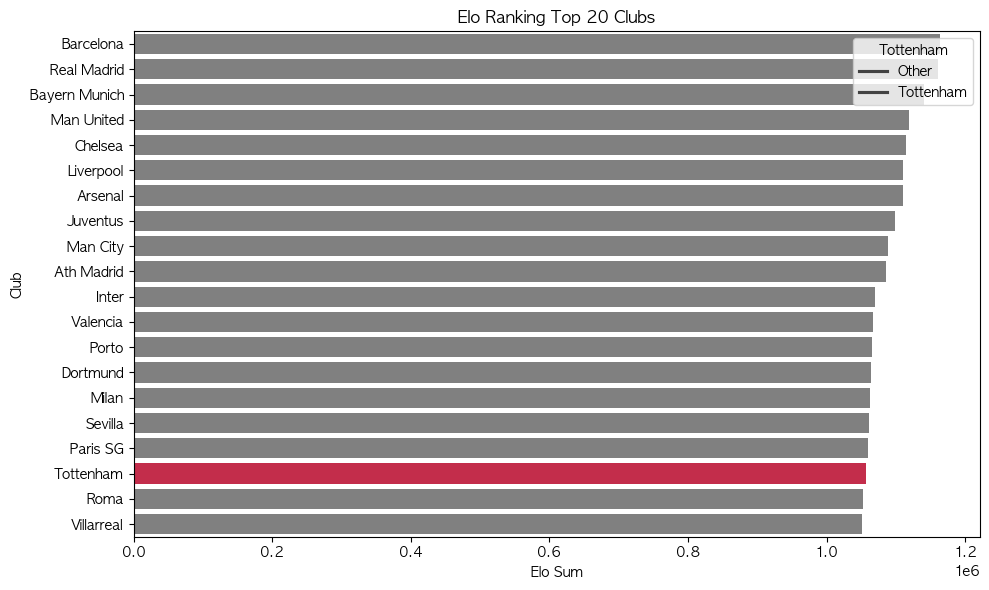

In [74]:
df_elo_top = df_elo.sort_values("elo_sum", ascending=False).head(20)

# 토트넘이 상위에 있으면 강조 색
df_elo_top["highlight"] = df_elo_top["club"].apply(lambda x: "Tottenham" in x)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_elo_top, x="elo_sum", y="club", hue="highlight", dodge=False, palette={True: "crimson", False: "gray"})
plt.title("Elo Ranking Top 20 Clubs")
plt.xlabel("Elo Sum")
plt.ylabel("Club")
plt.legend(title="Tottenham", labels=["Other", "Tottenham"])
plt.tight_layout()
plt.show()


/var/folders/vk/04vgyt4s7w58b10wq4bkrvg80000gn/T/ipykernel_96194/2931378378.py:16: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


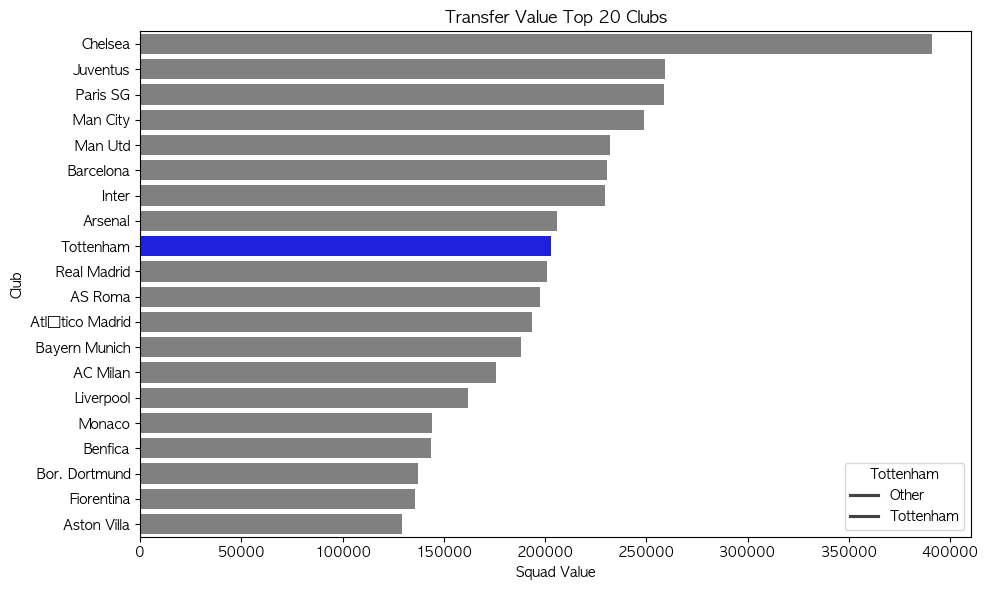

In [75]:
df_trans = pd.read_csv("../dataset/transfer_value_confirmed.csv")

# 2) 상위 20개 클럽 정렬
df_trans_top = df_trans.sort_values("sum", ascending=False).head(20)

# 3) 토트넘 강조
df_trans_top["highlight"] = df_trans_top["club"].apply(lambda x: "Tottenham" in x)

# 4) 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_trans_top, x="sum", y="club", hue="highlight", dodge=False, palette={True: "blue", False: "gray"})
plt.title("Transfer Value Top 20 Clubs")
plt.xlabel("Squad Value")
plt.ylabel("Club")
plt.legend(title="Tottenham", labels=["Other", "Tottenham"])
plt.tight_layout()
plt.show()

## 4. 범주형 데이터까지 country열 추가해서 만들기

In [76]:
elo_df = pd.read_csv('../origindata/EloRatings.csv')
clubs_df = pd.read_csv('final_club_stats.csv')

# 문자열 → 날짜 형식으로 변환
elo_df['date'] = pd.to_datetime(elo_df['date'])

# club 기준으로 가장 최근 날짜의 데이터를 가져오기
latest_elo_df = elo_df.sort_values('date').groupby('club', as_index=False).last()

# 확인용
print(latest_elo_df.head())


           club       date country      elo
0  A. Sebatspor 2005-07-01     TUR  1369.55
1           AEK 2025-03-01     GRE  1585.67
2           AIK 2025-03-01     SWE  1432.07
3           AVS 2025-03-01     POR  1397.54
4    AZ Alkmaar 2025-03-01     NED  1660.57


In [77]:
merged = clubs_df.merge(
    latest_elo_df[['club', 'elo', 'country']],
    on='club',
    how='left'   # 일치하지 않는 경우 NaN으로 남김
)

# 저장
merged.to_csv('final_club_stats2.csv', index=False)

In [78]:
df = pd.read_csv('final_club_stats2.csv')

# 사용할 범주형 열 목록
categorical_cols = ['country']  # 필요에 따라 추가 가능

# 각 열에 대해 도수분포표 생성
for col in categorical_cols:
    print(f"\n📊 도수분포표: {col}")
    print(df[col].value_counts(dropna=False))  # NaN 포함해서 출력


📊 도수분포표: country
country
ENG    22
ITA    14
TUR    13
POR    12
NED     9
ESP     7
GER     7
GRE     7
SCO     6
POL     5
FRA     5
SWE     4
BEL     4
NOR     4
RUS     4
ROM     2
DEN     1
AUT     1
Name: count, dtype: int64



📊 [도수분포표: country]
country
ENG    22
ITA    14
TUR    13
POR    12
NED     9
ESP     7
GER     7
GRE     7
SCO     6
POL     5
FRA     5
SWE     4
BEL     4
NOR     4
RUS     4
ROM     2
DEN     1
AUT     1
Name: count, dtype: int64


/var/folders/vk/04vgyt4s7w58b10wq4bkrvg80000gn/T/ipykernel_96194/4164472150.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index.astype(str), y=freq.values, palette='viridis')


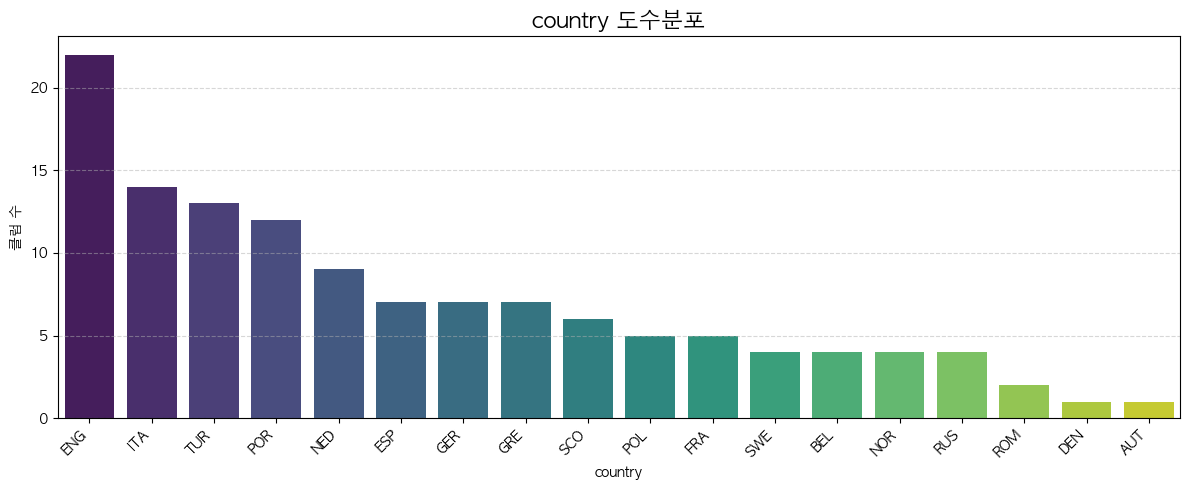

In [79]:
for col in categorical_cols:
    # 도수 계산
    freq = df[col].value_counts(dropna=False)

    # 텍스트 출력
    print(f"\n📊 [도수분포표: {col}]")
    print(freq)

    # 시각화
    plt.figure(figsize=(12, 5))
    sns.barplot(x=freq.index.astype(str), y=freq.values, palette='viridis')

    plt.title(f"{col} 도수분포", fontsize=16)
    plt.ylabel('클럽 수')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

분석 대상 수치형 변수: ['elo_sum', 'sum', 'max_capacity']


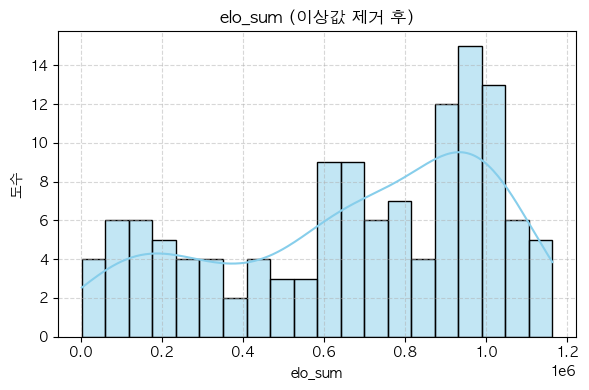

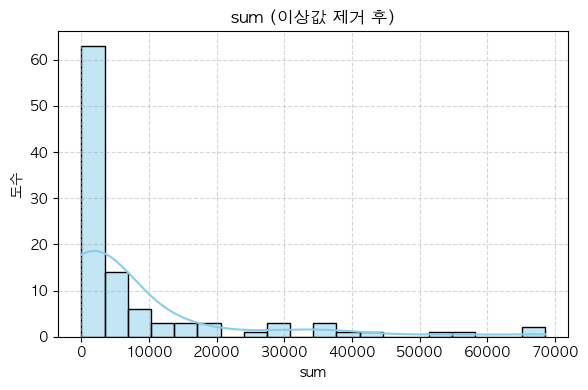

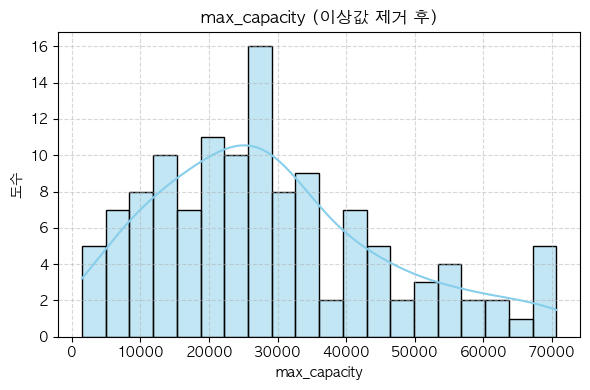


이상값 제거 후 왜도 및 첨도 요약:
            변수명  데이터 수  이상값 제거 전  왜도(Skewness)  첨도(Kurtosis)
0       elo_sum    127       127        -0.555         2.051
1           sum    105       127         2.513         9.082
2  max_capacity    124       127         0.672         2.886


In [80]:
#이상값 제거 
import scipy.stats as stats

df = df.drop(columns=['rank', '순위', 'elo'])
num_cols = df.select_dtypes(include='number').columns.tolist()

print("분석 대상 수치형 변수:", num_cols)

# 3. 이상값 제거 + 왜도/첨도 계산
results = []

for col in num_cols:
    # 이상값 기준: IQR 방식
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    filtered = df[(df[col] >= lower) & (df[col] <= upper)][col]

    skew = stats.skew(filtered, nan_policy='omit')
    kurt = stats.kurtosis(filtered, nan_policy='omit') + 3  # Fisher → Pearson로 변환

    results.append({
        '변수명': col,
        '데이터 수': len(filtered),
        '이상값 제거 전': len(df[col].dropna()),
        '왜도(Skewness)': round(skew, 3),
        '첨도(Kurtosis)': round(kurt, 3)
    })

    # 히스토그램 시각화
    plt.figure(figsize=(6, 4))
    sns.histplot(filtered, kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (이상값 제거 후)")
    plt.xlabel(col)
    plt.ylabel("도수")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 4. 결과 테이블 출력
summary_df = pd.DataFrame(results)
print("\n이상값 제거 후 왜도 및 첨도 요약:")
print(summary_df)

## 8. 상관계수 검토 및 상관계수 값 0.7 이상인 변수 제거

### 개요
데이터 분석 및 머신러닝에서 변수 간 상관관계를 검토하는 것은 매우 중요
상관계수(correlation coefficient)는 두 변수 간의 선형 관계 정도를 나타내며, 값은 -1에서 1 사이

- **상관계수 1 또는 -1**: 완전한 양/음의 선형 관계
- **상관계수 0**: 두 변수 간 선형 관계 없음

### 왜 0.7 이상인가?
- 일반적으로 **상관계수 절댓값이 0.7 이상이면 두 변수는 강한 선형 상관관계**가 있다고 판단합니다.
- 이 경우 두 변수는 비슷한 정보를 많이 공유하기 때문에, 둘 다 모델에 포함하면 다중공선성 문제를 일으킬 수 있습니다.

### 다중공선성 문제
- 변수들 간 높은 상관관계는 회귀 분석 등의 모델에서 **계수 추정의 불안정성**을 초래
- 이는 모델의 해석력을 떨어뜨리고, 예측 성능에도 악영향을 줄 수 있음

### 변수 제거의 의미
- 상관계수 0.7 이상인 변수 쌍에서 한쪽 변수를 제거하여 **중복 정보 제거** 및 **모델 단순화**를 수행
- 이렇게 하면 모델의 안정성과 해석력이 개선됩니다.


In [81]:
num_df = df.select_dtypes(include='number')

corr_matrix = num_df.corr()

# 상관계수 ≥ 0.7인 변수쌍 찾기 (자기 자신 제외)
threshold = 0.7
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]

        if abs(corr_value) >= threshold:
            high_corr.append((col1, col2, round(corr_value, 3)))

# 결과 출력
if high_corr:
    print(" 상관계수 0.7 이상인 변수쌍:")
    for col1, col2, corr in high_corr:
        print(f"{col1} ↔ {col2}: {corr}")
else:
    print(" 상관계수 0.7 이상인 변수쌍이 없습니다.")

 상관계수 0.7 이상인 변수쌍이 없습니다.


# 9. t-통계량


# t-검정 (T-Test)

## 개념
t-검정은 두 그룹 간 **평균 차이가 통계적으로 유의한지**를 판단하는 통계 기법입니다.  
특히, **이진값(두 그룹) 타깃 변수**와 **연속형 변수** 사이 관계를 분석할 때 사용됩니다.

---

## 조건
- 타깃 변수는 두 가지 값(예: 0과 1)만 가짐 → **이진 변수 (binary target)**
- 비교 대상 변수는 연속형 변수(예: 키, 몸무게, 점수 등)

---

## 목적
- 두 그룹(타깃 값 0과 1)의 연속형 변수 평균 차이가 통계적으로 유의한지 검증  
- 즉, 두 집단의 평균이 같다는 귀무가설(H0)을 검정

---

## t-검정 종류
- **독립표본 t-검정 (Independent t-test)**  
  서로 다른 두 그룹이 독립적일 때 사용
- **대응표본 t-검정 (Paired t-test)**  
  같은 대상의 두 조건 비교 시 사용

---

## 수행 방법
1. 타깃 값 0인 그룹과 1인 그룹에서 연속형 변수의 값 추출  
2. 두 그룹의 평균 차이가 유의미한지


In [85]:
df = pd.read_csv('../dataset/elo_by_club_year.csv')

years = [str(y) for y in range(2000, 2025)]

# 2) 모든 연도 0 점수인 클럽 제거
df = df[~(df[years].sum(axis=1) == 0)]

# 3) 소문자 통일
df['club'] = df['club'].str.lower()

# 4) 토트넘 데이터
tottenham_row = df[df['club'] == 'tottenham']

if tottenham_row.empty:
    print("토트넘 데이터가 없습니다.")
else:
    # 5) 전체 클럽 연도별 Elo 합계 계산
    df['elo_sum'] = df[years].sum(axis=1)

    # 6) 토트넘 제외 상위 10개 클럽 선정
    top5_df = df[df['club'] != 'tottenham'].nlargest(10, 'elo_sum')

    # 7) 빅클럽 평균 Elo (연도별)
    big_clubs_mean = top5_df[years].mean(axis=0).values

    # 8) 토트넘 Elo 점수
    tottenham_elo = tottenham_row[years].values.flatten()

    # 9) 0값 제외 인덱스
    valid_idx = (tottenham_elo != 0) & (big_clubs_mean != 0)

    tottenham_vals = tottenham_elo[valid_idx]
    big_clubs_vals = big_clubs_mean[valid_idx]

    # 10) 대응표본 t-검정
    t_stat, p_value = stats.ttest_rel(tottenham_vals, big_clubs_vals)

    print(f"t-통계량: {t_stat:.4f}")
    print(f"p-값: {p_value:.4f}")

    if p_value < 0.05:
        print("귀무가설 기각: 토트넘은 상위 10개 빅클럽과 통계적으로 다릅니다.")
    else:
        print("귀무가설 채택: 토트넘은 상위 10개 빅클럽과 차이가 없습니다.")


t-통계량: -11.4757
p-값: 0.0000
귀무가설 기각: 토트넘은 상위 10개 빅클럽과 통계적으로 다릅니다.
